In [1]:
from tensorflow.keras.datasets import boston_housing
import pandas as pd
(train_data,train_target),(test_data,test_target) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)

57344/57026 [==============================] - 0s 0us/step
(404, 13)
(102, 13)


In [14]:
%precision %.5f
import numpy as np ; np.set_printoptions(precision=5,suppress=True)

In [6]:
columns = ['Age','B','RM','CRIM','DIS','INDUS','LSTAT','NOX','PTRATIO','RAD','ZN','TAX','CHAS']
print(len(columns))

13


In [32]:
import pandas as pd 

# CRIM, RM, LSTAT 을 통한 다중 선형 회귀 분석

In [22]:
import statsmodels.api as sm 
x_data = train_data[:,2:5]
target = train_target

In [24]:
x_data1 = sm.add_constant(x_data,has_constant=True)
multi_model = sm.OLS(target,x_data1)
fitted_model = multi_model.fit()

In [25]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.79
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.67e-28
Time:                        05:43:13   Log-Likelihood:                -1403.5
No. Observations:                 404   AIC:                             2815.
Df Residuals:                     400   BIC:                             2831.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4215      2.282     15.524      0.000      30.936      39.907
x1            -0.4576      0.091     -5.048      0.000      -0.636      -0.279
x2             7.7085      1.625      4.742      0.000       4.513      10.904
x3           -15.1099      5.275     -2.865      0.004     -25.479      -4.741
==============================================================================
Omnibus:                      141.869   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.374
Skew:                           1.668   Prob(JB):                     2.85e-90
Kurtosis:                       6.657   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
full_data = sm.add_constant(train_data, has_constant= True)
full_model = sm.OLS(target,full_data)
full_model = full_model.fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     85.37
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          2.46e-105
Time:                        05:51:32   Log-Likelihood:                -1197.7
No. Observations:                 404   AIC:                             2423.
Df Residuals:                     390   BIC:                             2479.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.2937      5.811      6.935      0.0

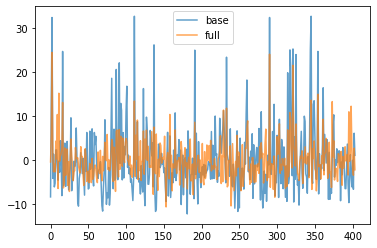

In [36]:
import matplotlib.pyplot as plt 
plt.plot(range(len(fitted_model.resid)),fitted_model.resid,label = "base",alpha=0.7)
plt.plot(range(len(full_model.resid)),full_model.resid,label= "full",alpha=0.7)
plt.legend()
plt.show()

In [34]:
df = pd.DataFrame(train_data,columns = columns)

In [37]:
# 상관 행렬
df.corr()

,Age,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
Age,1.000000,-0.192179,0.397419,-0.050828,0.405765,-0.217597,0.344410,-0.378590,0.609689,0.575652,0.273447,-0.390613,0.434384
B,-0.192179,1.000000,-0.533823,-0.041981,-0.521713,0.338683,-0.578728,0.650787,-0.311091,-0.303522,-0.403139,0.176006,-0.415237
RM,0.397419,-0.533823,1.000000,0.052839,0.774200,-0.409924,0.656350,-0.725155,0.599226,0.701362,0.379284,-0.372885,0.603129
CRIM,-0.050828,-0.041981,0.052839,1.000000,0.079803,0.040431,0.080488,-0.083101,-0.024851,-0.051343,-0.122008,0.037832,-0.011017
DIS,0.405765,-0.521713,0.774200,0.079803,1.000000,-0.335866,0.729338,-0.777062,0.616535,0.673471,0.188160,-0.409479,0.592994
INDUS,-0.217597,0.338683,-0.409924,0.040431,-0.335866,1.000000,-0.240875,0.233970,-0.243990,-0.307904,-0.367256,0.145525,-0.610844
LSTAT,0.344410,-0.578728,0.656350,0.080488,0.729338,-0.240875,1.000000,-0.766670,0.462188,0.512746,0.282193,-0.278403,0.590898
NOX,-0.378590,0.650787,-0.725155,-0.083101,-0.777062,0.233970,-0.766670,1.000000,-0.511179,-0.543668,-0.243067,0.295995,-0.507075
PTRATIO,0.609689,-0.311091,0.599226,-0.024851,0.616535,-0.243990,0.462188,-0.511179,1.000000,0.922676,0.449908,-0.478245,0.490250
RAD,0.575652,-0.303522,0.701362,-0.051343,0.673471,-0.307904,0.512746,-0.543668,0.922676,1.000000,0.440499,-0.471777,0.534752


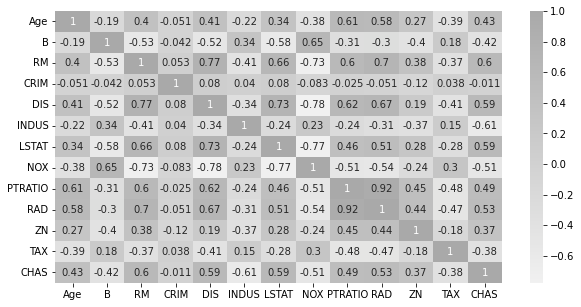

In [42]:
# 상관행렬에 대한 시각화 
import seaborn as sns 
plt.figure(figsize=[10,5])
cmap = sns.light_palette("darkgray",as_cmap = True)
sns.heatmap(df.corr(),annot=True, cmap = cmap)
plt.show()

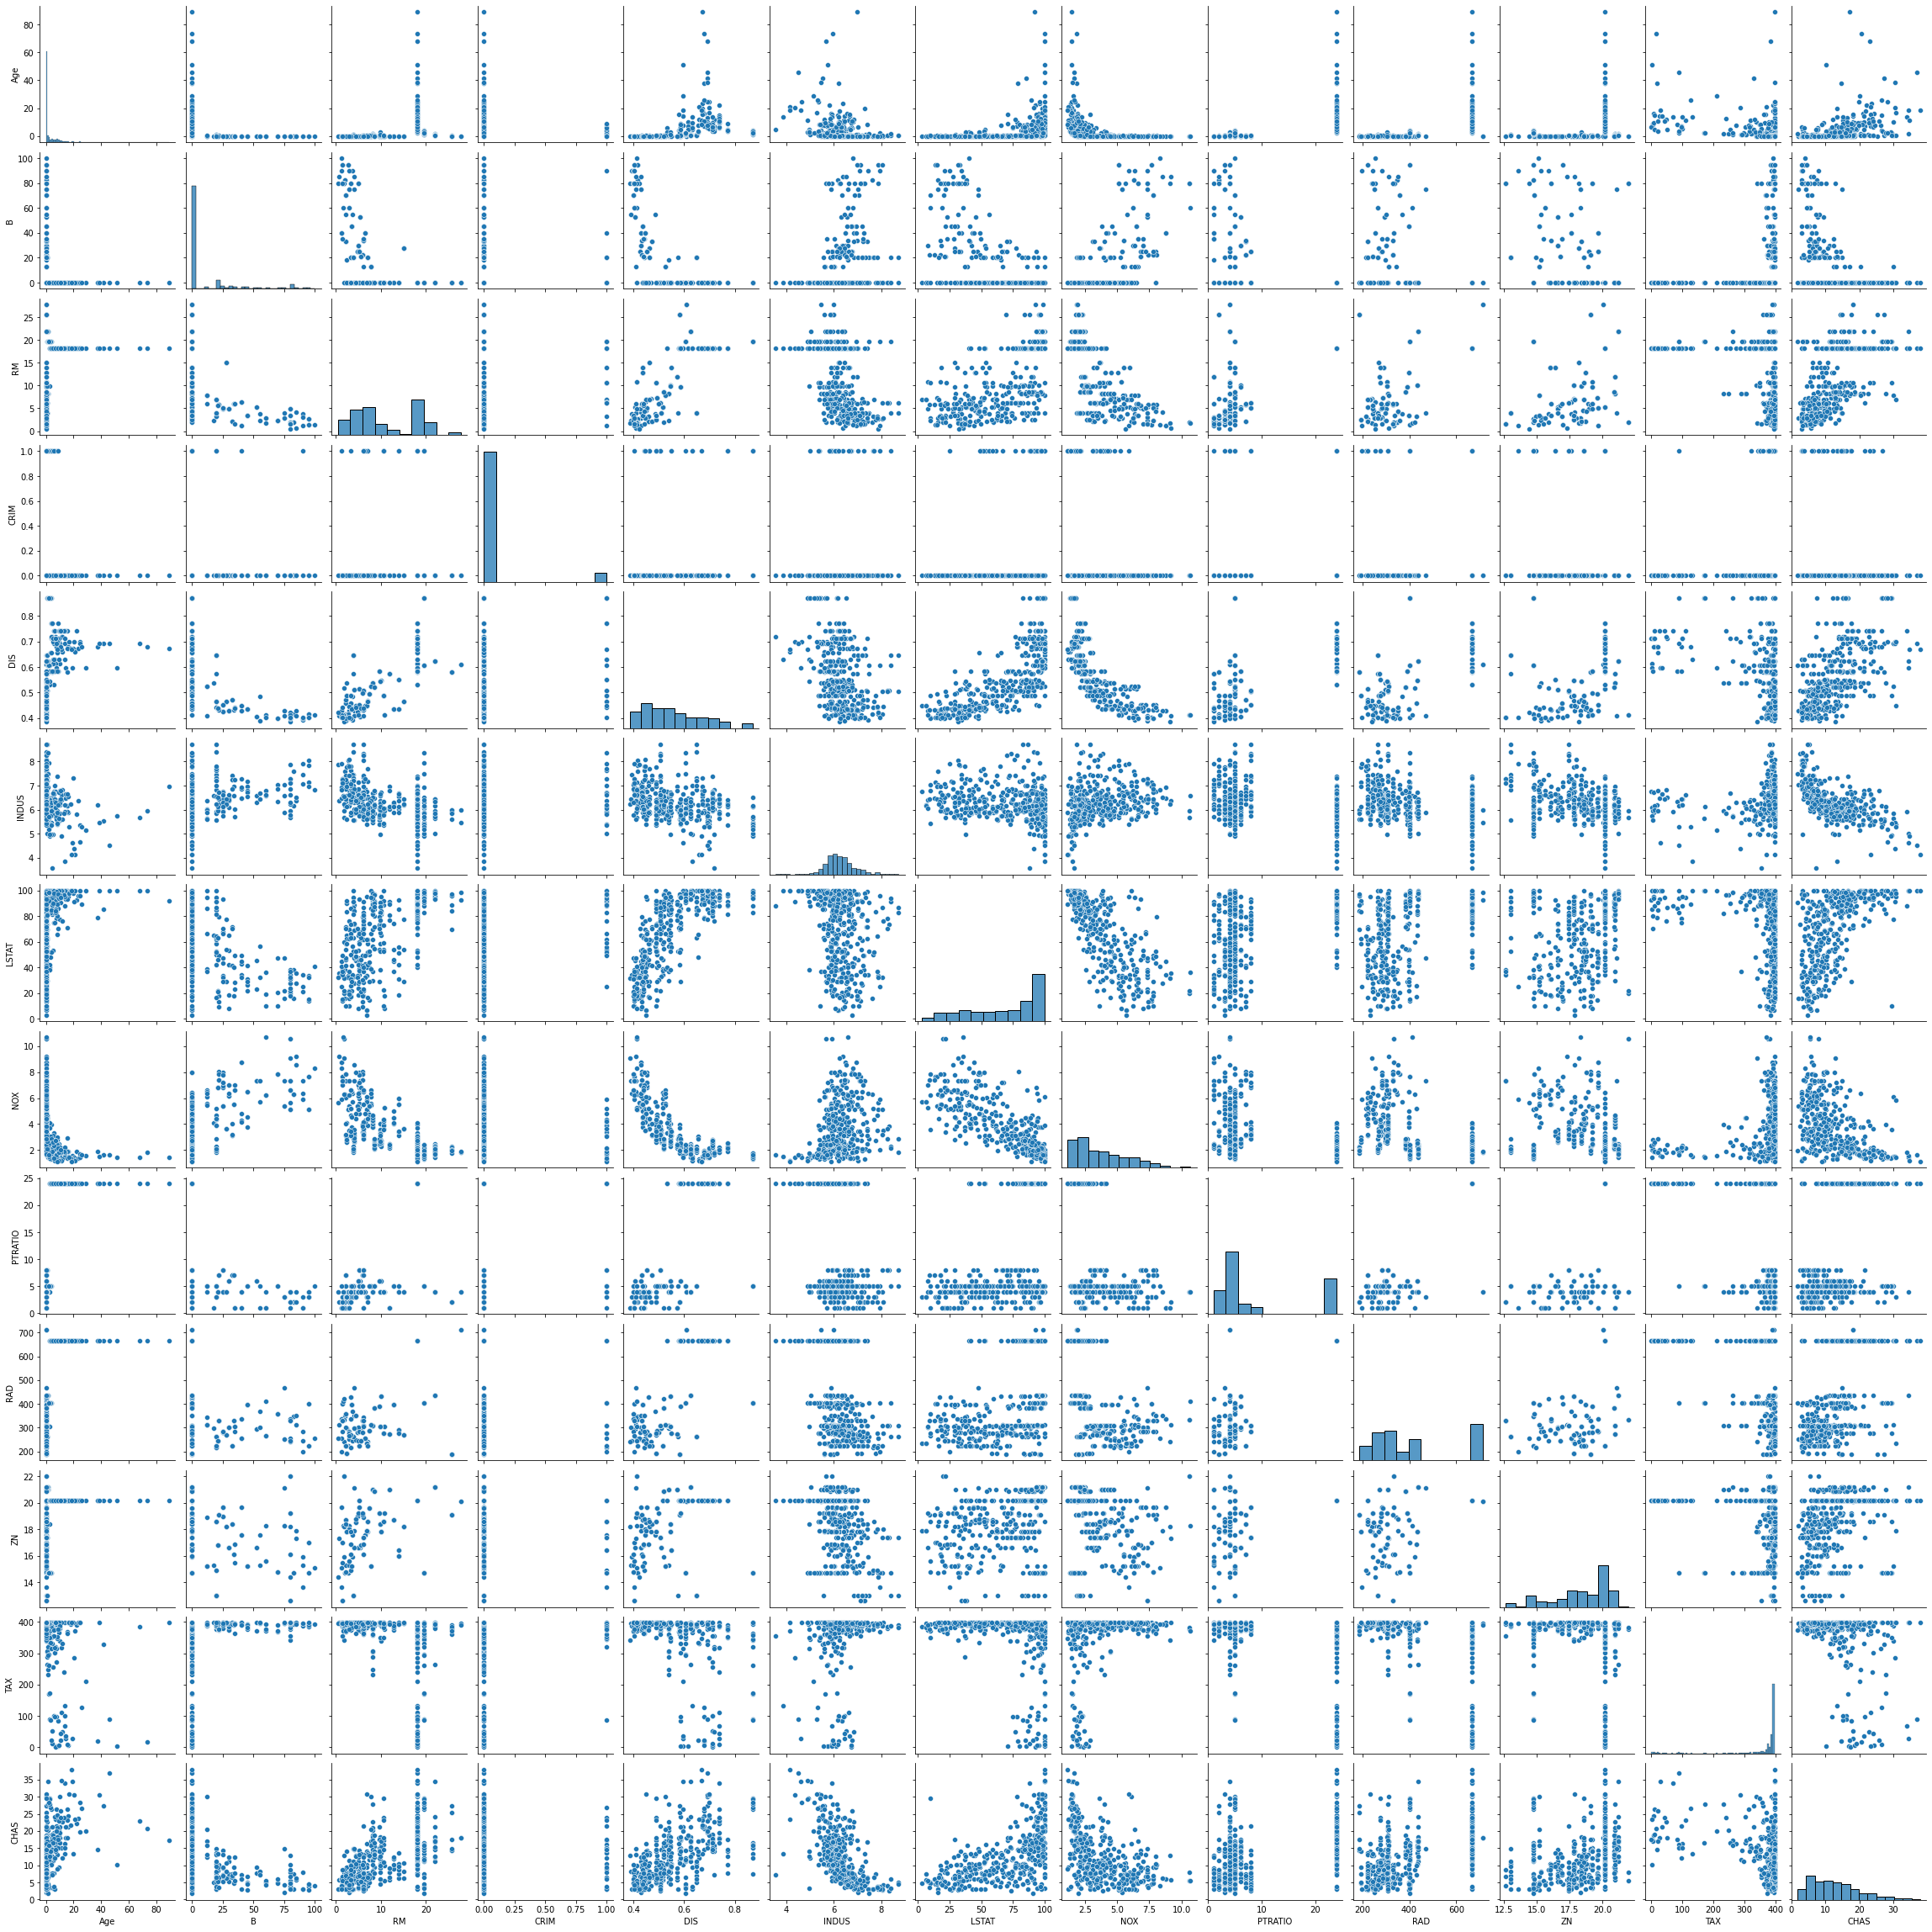

In [44]:
# 변수별 산점도 시각화 
sns.pairplot(df)
plt.show()

# VIF를 통한 다중 공선성 확인 

- 확인된 공선성을 기반으로 새로운 linear regression model을 고안하여 계속해서 성능을 높이는 것이 regression model의 목표

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features'] = df.columns

In [50]:
vif
# 해당 feature를 y 값으로 두고 나머지 변수들 가지고 회귀를 돌렸을 때, 해당 y값을 얼마나 설명이 가능한지에 대한 비율을 의미 >>> 높을수록 공선성이 크기에 제거해야함 

,VIF Factor,Features
0,1.988188,Age
1,2.804119,B
2,14.145754,RM
3,1.125530,CRIM
4,73.083297,DIS
5,76.616433,INDUS
6,22.825374,LSTAT
7,15.680199,NOX
8,16.922434,PTRATIO
9,67.037524,RAD
